# Old Data Cleaning
Just so that the code works.

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
%matplotlib inline

In [87]:
import seaborn as sns
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

In [88]:
df=pd.read_pickle('./dataset_/dataset_cleaned_popularity.pkl')

# Artist Popularity
by sum of popularity of songs; the result is then mapped to [0,1].

In [90]:
# I created a test df here to not mess with our tidy dataframe 
# by adding an artist_popularity column that we might not want there
test_df = df
test_df['popularity'] = (test_df['popularity']-test_df['popularity'].min())/(test_df['popularity'].max()-test_df['popularity'].min())
test_df['artist_popularity'] = test_df.groupby('artist')['popularity'].transform('sum')
test_df['artist_popularity'] = (test_df['artist_popularity']-test_df['artist_popularity'].min())/(test_df['artist_popularity'].max()-test_df['artist_popularity'].min())

In [91]:
test_df[['artist','artist_popularity']].sample(frac=1).head(10)

,artist,artist_popularity
164993,Eason Chan,0.015960
76437,Agust D,0.002074
104185,SHIRIN DAVID - GIMS,0.002694
31971,Billie Eilish,0.521633
82540,Seeb - Dagny,0.006102
46126,BTS,0.133061
49147,Lana Del Rey,0.008434
165177,Bae Lin - Nana Ou-Yang,0.000020
109141,Miami Yacine,0.014426
142598,Stray Kids,0.003131


## Get Artist by (Calculated) Popularity

In [93]:
artist_popularity = test_df[['artist','artist_popularity']].drop_duplicates()
artist_popularity.sort_values('artist_popularity', ascending=False).head(10)

,artist,artist_popularity
6210,Ed Sheeran,1.000000
2690,Billie Eilish,0.521633
320,Dua Lipa,0.492004
117,Drake,0.491809
747,Ariana Grande,0.490292
1839,Post Malone,0.476521
658,XXXTENTACION,0.377199
8767,Lewis Capaldi,0.311130
1035,The Weeknd,0.310360
5867,Imagine Dragons,0.302311


What if we just count the appearances?

<AxesSubplot:title={'center':'Most Occuring Artist in Dataset'}, ylabel='Artist'>

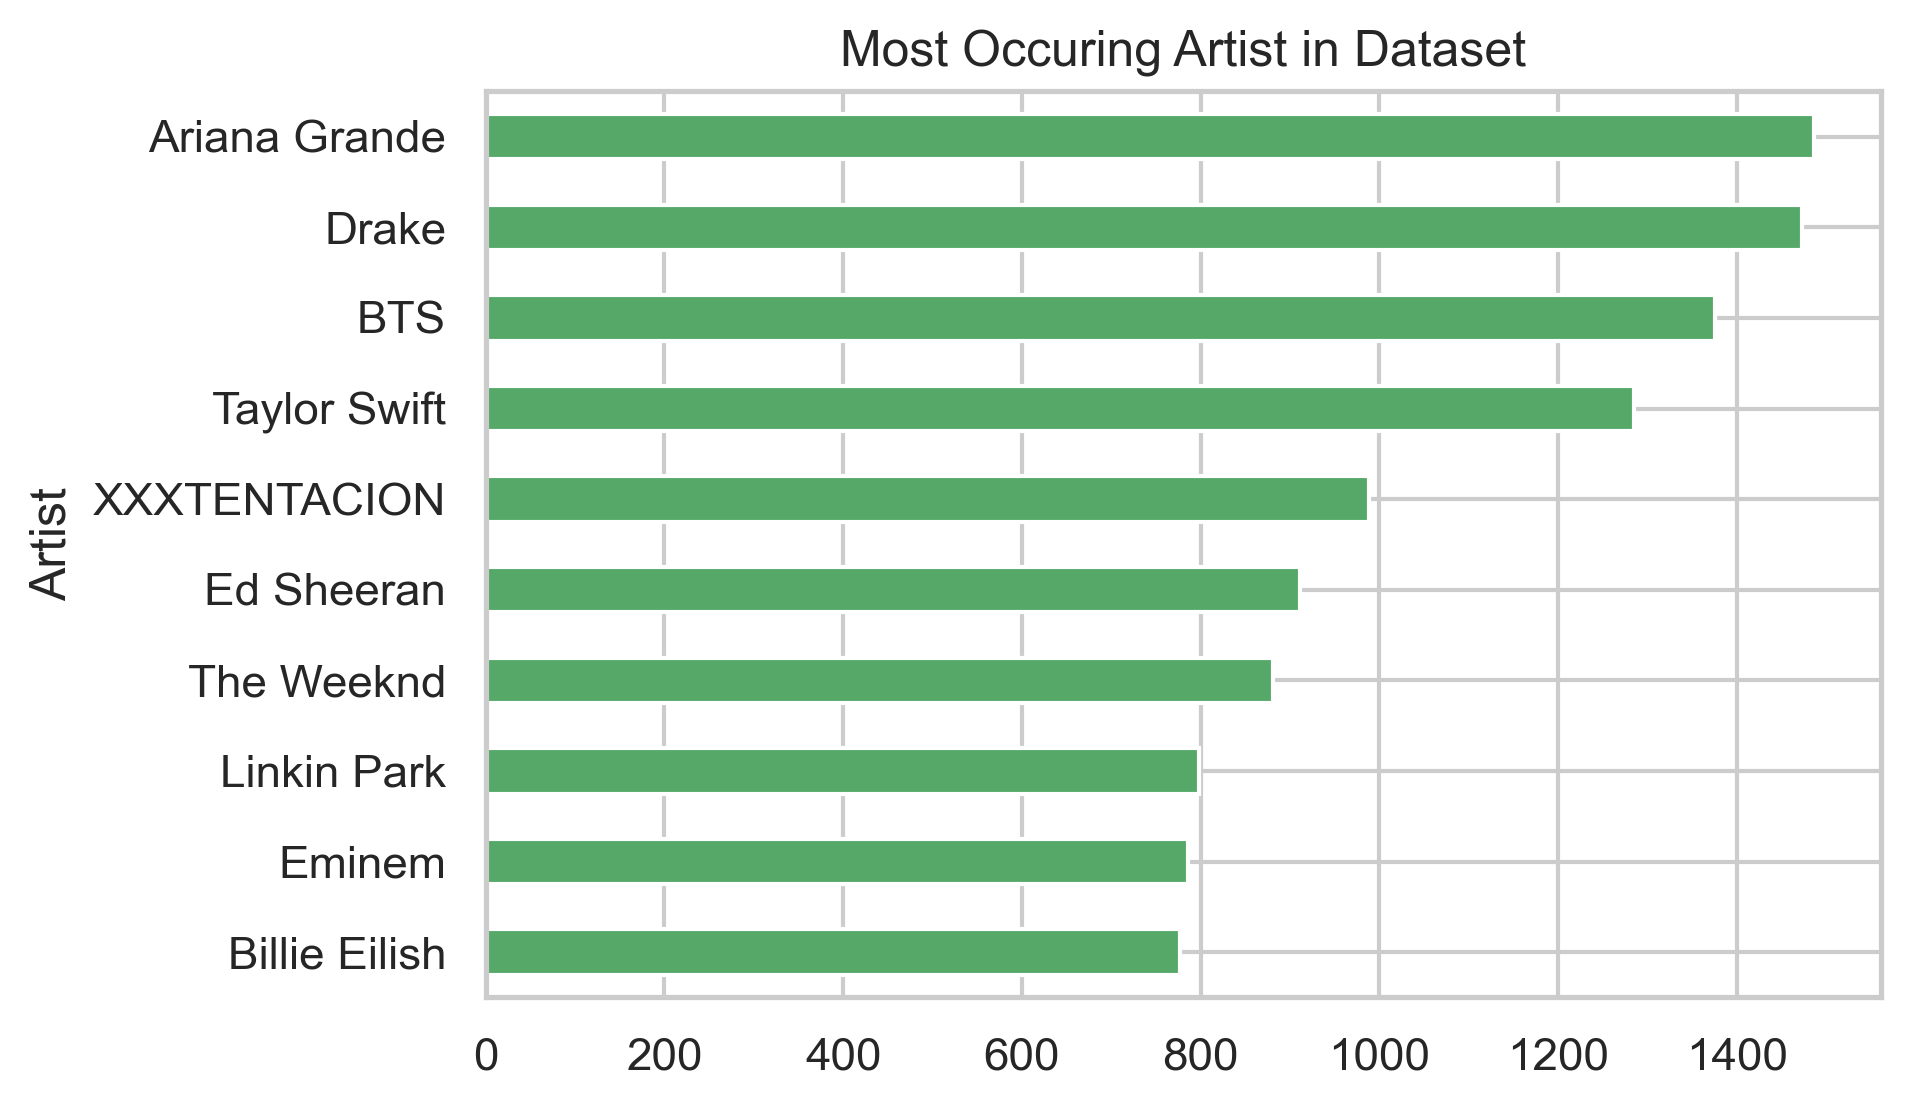

In [129]:
aux_df = df.groupby('artist').size().sort_values(ascending=False)[:10]
aux_df.sort_values().plot(kind='barh', color = 'g', title='Most Occuring Artist in Dataset', xlabel="Artist")

##  Artist Popularity per Country
### Germany

In [103]:
# Only German charts
germany = df[test_df['country']=='Germany']

# Calculate artist_popularity in Germany as before with all (sum over all song popularities and mapping btwn 0 and 1)
germany['artist_popularity'] = germany.groupby('artist')['popularity'].transform('sum')
germany['artist_popularity'] = (germany['artist_popularity']-germany['artist_popularity'].min())/(germany['artist_popularity'].max()-germany['artist_popularity'].min())

# Drop duplicates 
artist_popularity_germany = germany[['artist','artist_popularity']].drop_duplicates()

# List top 10 artists in Germany
artist_popularity_germany.sort_values('artist_popularity', ascending=False).head(10)

,artist,artist_popularity
1562,Apache 207,1.000000
23285,Capital Bra,0.663605
6223,Ed Sheeran,0.558611
3729,Luciano,0.475254
4287,Bonez MC - RAF Camora,0.469129
1119,Ufo361,0.426831
11097,RIN,0.420004
30249,RAF Camora,0.374885
56654,Bausa,0.372888
2758,Samra,0.355336


<AxesSubplot:title={'center':'Most Occuring Artists in German Charts'}>

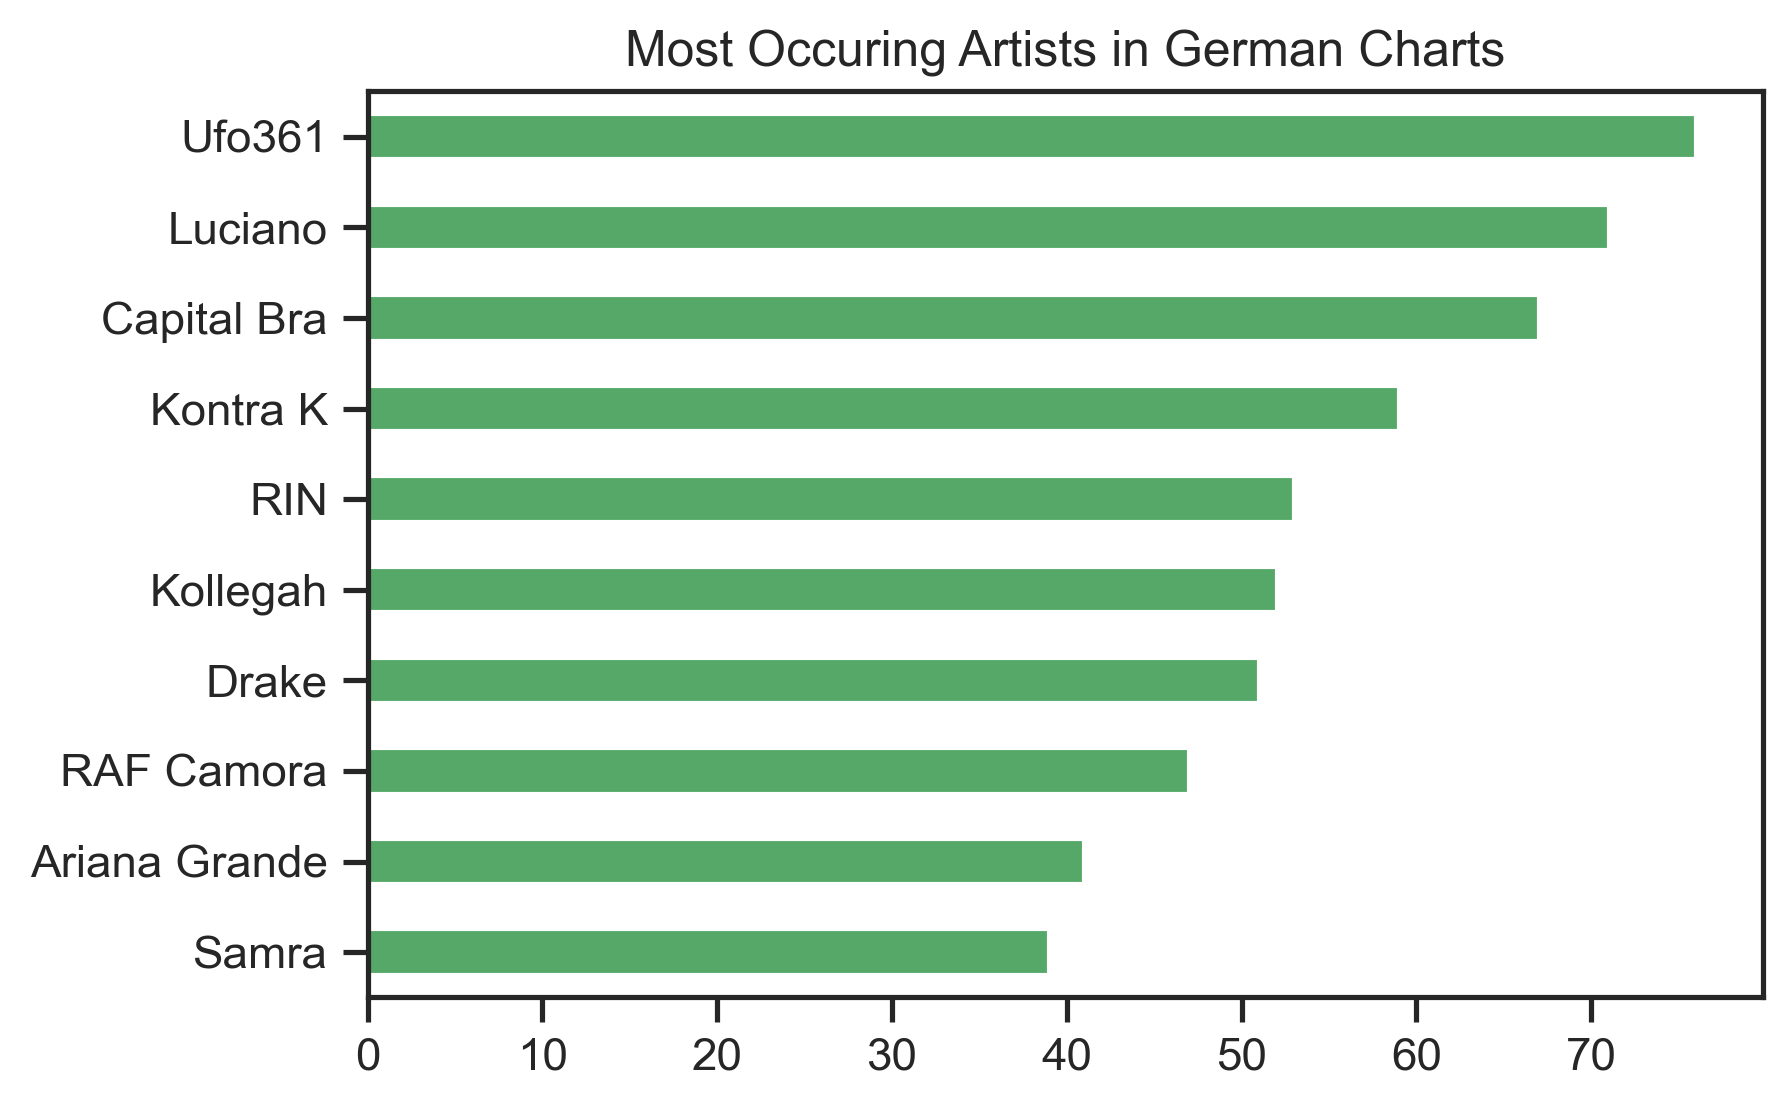

In [104]:
# Most occuring 
aux_df = germany.groupby('artist').size().sort_values(ascending=False)[:10]
aux_df.sort_values().plot(kind='barh', color = 'g',title='Most Occuring Artists in German Charts', xlabel="Artist")

### USA

In [105]:
usa = df[test_df['country']=='USA']
usa['artist_popularity'] = usa.groupby('artist')['popularity'].transform('sum')
usa['artist_popularity'] = (usa['artist_popularity']-usa['artist_popularity'].min())/(usa['artist_popularity'].max()-usa['artist_popularity'].min())

artist_popularity_usa = usa[['artist','artist_popularity']].drop_duplicates()
artist_popularity_usa.sort_values('artist_popularity', ascending=False).head(10)

,artist,artist_popularity
1840,Post Malone,1.000000
659,XXXTENTACION,0.874617
118,Drake,0.830358
1137,Travis Scott,0.735029
1248,Juice WRLD,0.694348
2139,Lil Uzi Vert,0.636172
6365,Billie Eilish,0.632523
748,Ariana Grande,0.546399
6082,Khalid,0.448957
15886,Kendrick Lamar,0.353948


<AxesSubplot:title={'center':'Most Occuring Artists in American Charts'}>

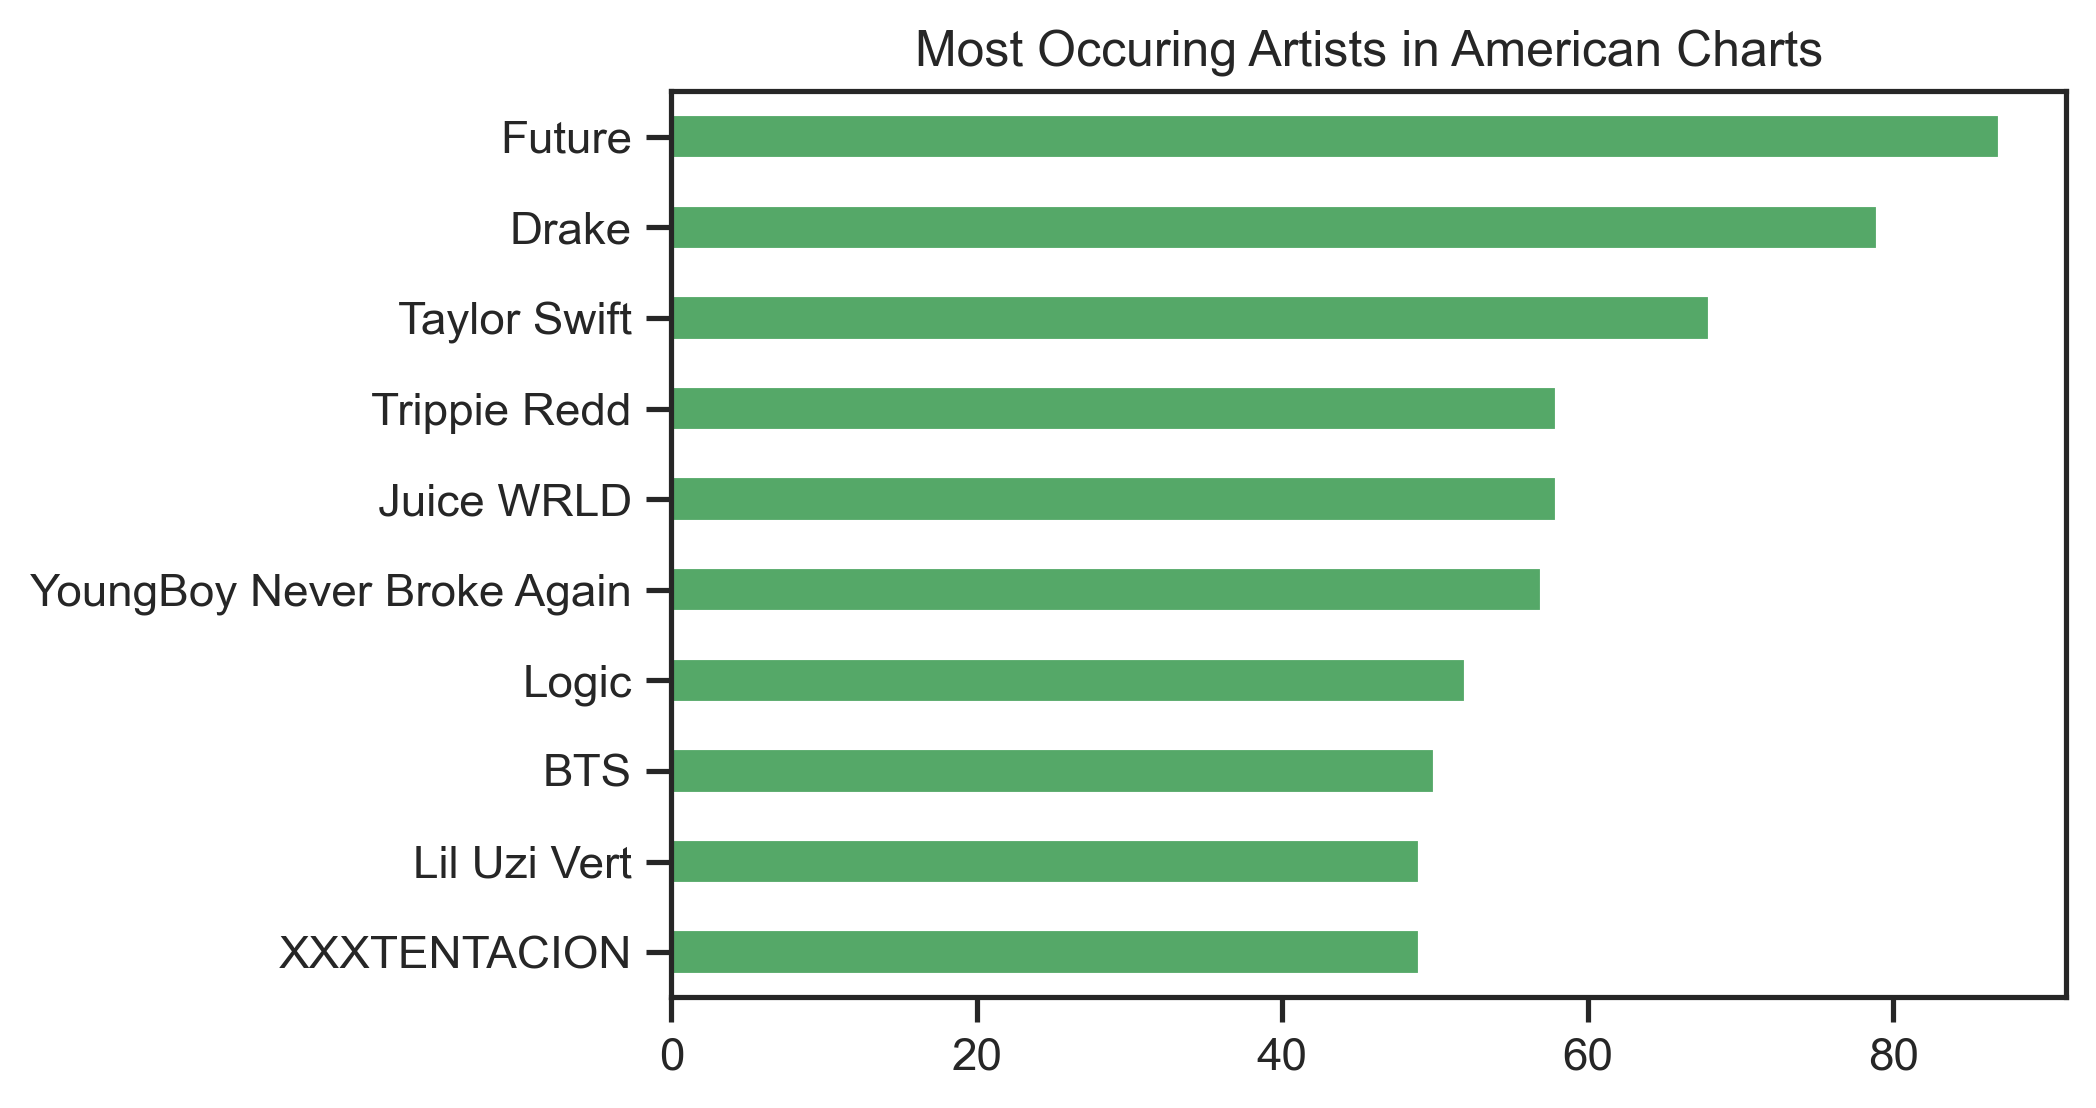

In [106]:
aux_df = usa.groupby('artist').size().sort_values(ascending=False)[:10]
aux_df.sort_values().plot(kind='barh', color = 'g',title='Most Occuring Artists in American Charts', xlabel="Artist")

### Global

In [107]:
global_ = test_df[test_df['country']=='Global']
global_['artist_popularity'] = global_.groupby('artist')['popularity'].transform('sum')
global_['artist_popularity'] = (global_['artist_popularity']-global_['artist_popularity'].min())/(global_['artist_popularity'].max()-global_['artist_popularity'].min())

artist_popularity_global = global_[['artist','artist_popularity']].drop_duplicates()
artist_popularity_global.sort_values('artist_popularity', ascending=False).head(10)

,artist,artist_popularity
6210,Ed Sheeran,1.000000
6364,Billie Eilish,0.763699
1839,Post Malone,0.762985
117,Drake,0.757352
747,Ariana Grande,0.718058
658,XXXTENTACION,0.708867
1136,Travis Scott,0.560846
320,Dua Lipa,0.513060
1035,The Weeknd,0.419197
1247,Juice WRLD,0.343683


<AxesSubplot:title={'center':'Most Occuring Artists in Global Charts'}>

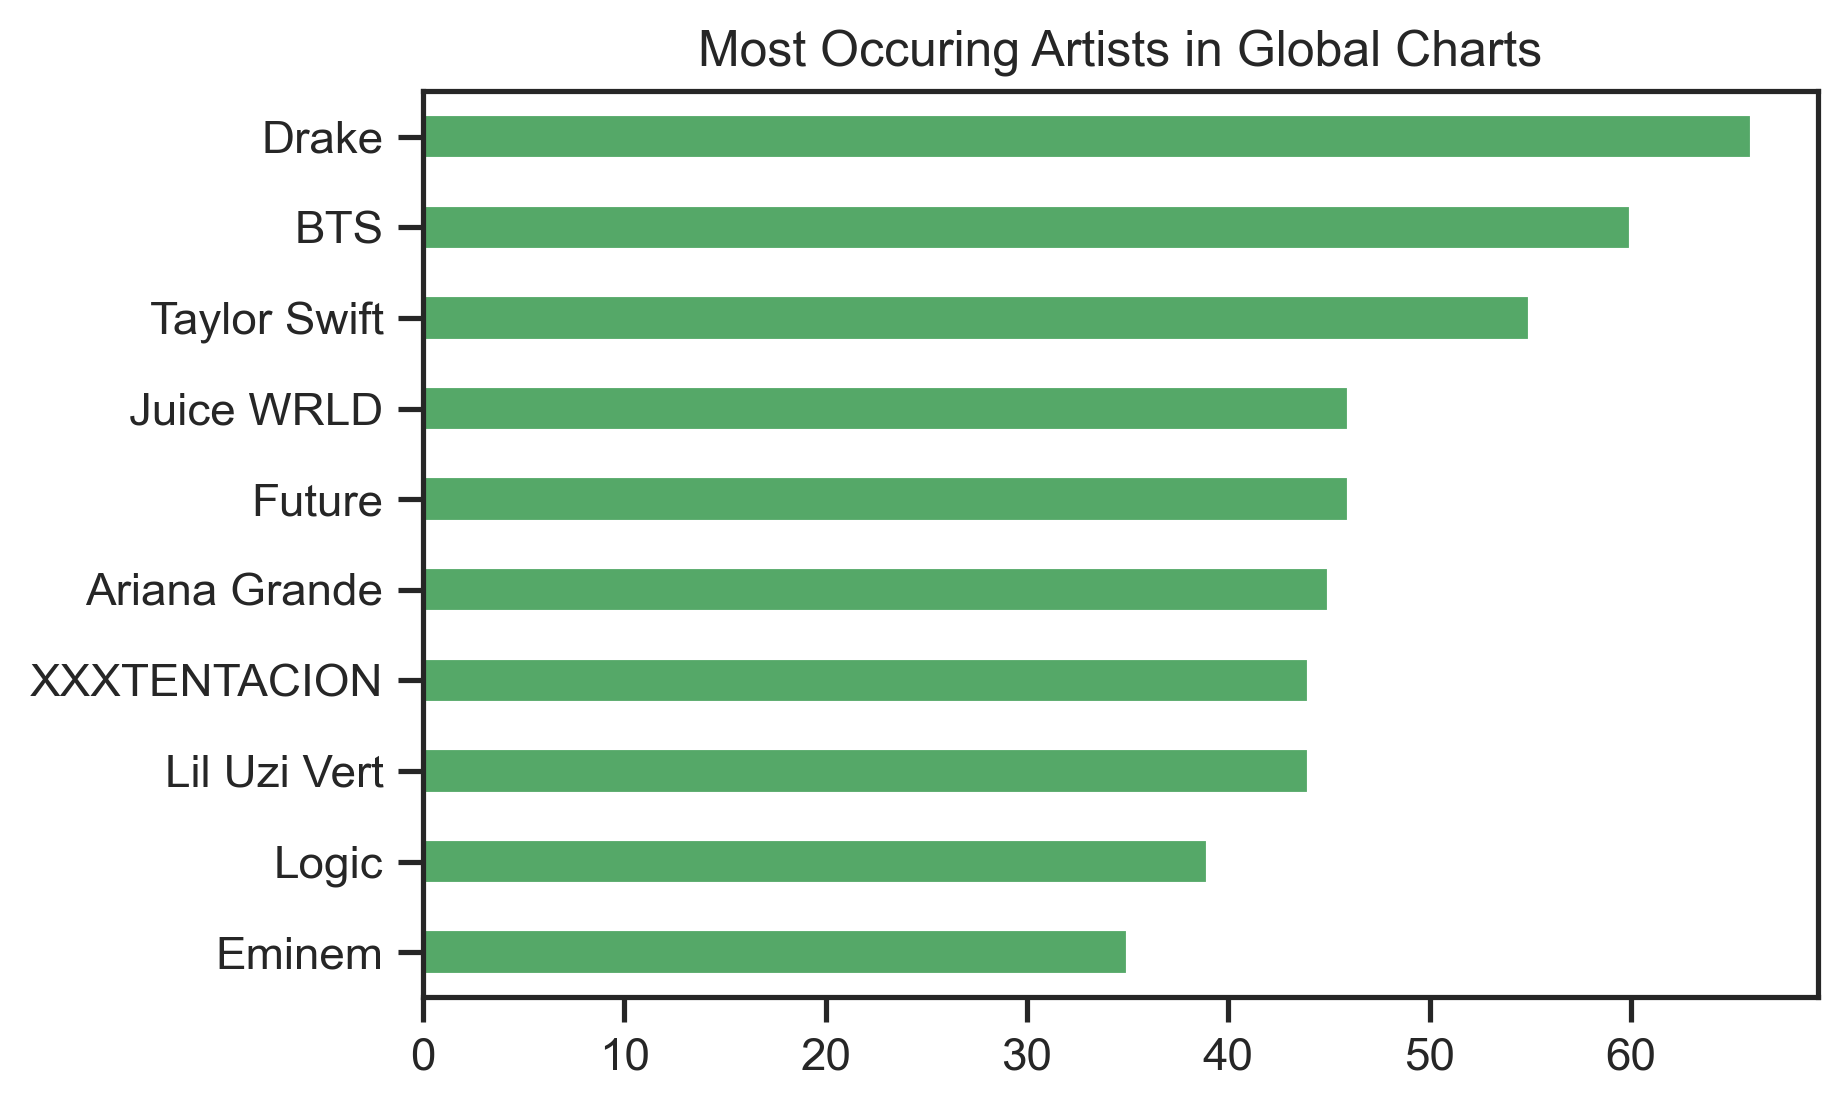

In [108]:
aux_df = global_.groupby('artist').size().sort_values(ascending=False)[:10]
aux_df.sort_values().plot(kind='barh', color = 'g',title='Most Occuring Artists in Global Charts', xlabel="Artist")

## Popularity by Artist Followers
Result: We don't get anything from this

WARNING: This might be useless code but I still wanted to include it

In [109]:
artist_followers = df[['artist','artist_followers']].drop_duplicates()

# artist_followers=artist_followers.replace('n-a','0')

# artist_followers = artist_followers.astype({'Artist_followers':'float'})

In [111]:
artist_followers.sort_values(by=['artist_followers'],ascending=False, inplace=True)

In [112]:
artist_followers.head(10)

,artist,artist_followers
92783,Ed Sheeran - Jaykae - Aitch - Stormzy,71783101.0
55774,Ed Sheeran - Camila Cabello - Cardi B,71783101.0
74266,Ed Sheeran - Travis Scott,71783101.0
18662,Ed Sheeran - Khalid,71783101.0
129250,Ed Sheeran - Tiësto,71783101.0
13357,Ed Sheeran - Yebba,71783101.0
70770,Ed Sheeran - H.E.R.,71783101.0
153186,Ed Sheeran - Seeb,71783101.0
153861,Ed Sheeran - Robin Schulz,71783101.0
66864,Ed Sheeran - Travis Scott - MK,71783101.0


# Genre per Year

WARNING! I saved the cleaned dataset as 'cleaned_dataset.csv'. This code will not work for you if you don't create this file

In [118]:
# df = pd.read_csv('cleaned_dataset.csv')
# df['release_year'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d').dt.year
# df['release_year'] = df.release_year.astype(int)
df=pd.read_pickle('./dataset_/dataset_cleaned_popularity.pkl')

In [119]:
df.head()

,level_0,index,country,uri,popularity,title,artist,release_type,sub_genre,artist_followers,explicit,album,release_date,track_number,tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveness,valence,tempo,time_signature,genre,days_since_release,released_after_2017,explicit_false,explicit_true,popu_max,top10_dummy,top50_dummy,cluster,duration_min,release_year,release_month,release_day
0,0,0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,10,1.0,1.0,global,4.31065,2018,11,5
1,1,1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,191,0.0,0.0,english speaking and nordic,4.31065,2018,11,5
2,2,2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,1,1.0,1.0,spanish speaking,4.31065,2018,11,5
3,3,3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,126,0.0,0.0,english speaking and nordic,4.31065,2018,11,5
4,4,4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,21,0.0,1.0,english speaking and nordic,4.31065,2018,11,5


In [120]:
genres = df['genre'].unique()
genres

array(['hip hop', 'pop', 'metal', 'indie', 'rap', 'funk', 'r&b/soul',
       'k-pop', 'rock', 'dance/electronic', 'latin', 'trap', 'country',
       'house', 'reggaeton', 'boy band', 'else', 'bolero', 'reggae',
       'jazz', 'opm'], dtype=object)

In [121]:
x = df[df['genre'] == 'pop']['release_year'].value_counts() # .plot(x= 'release_year')
x.sum()

60020

In [122]:
# sns.lineplot(data=x)

Text(0.5, 1.0, 'Amount of Songs Released Under a Genre')

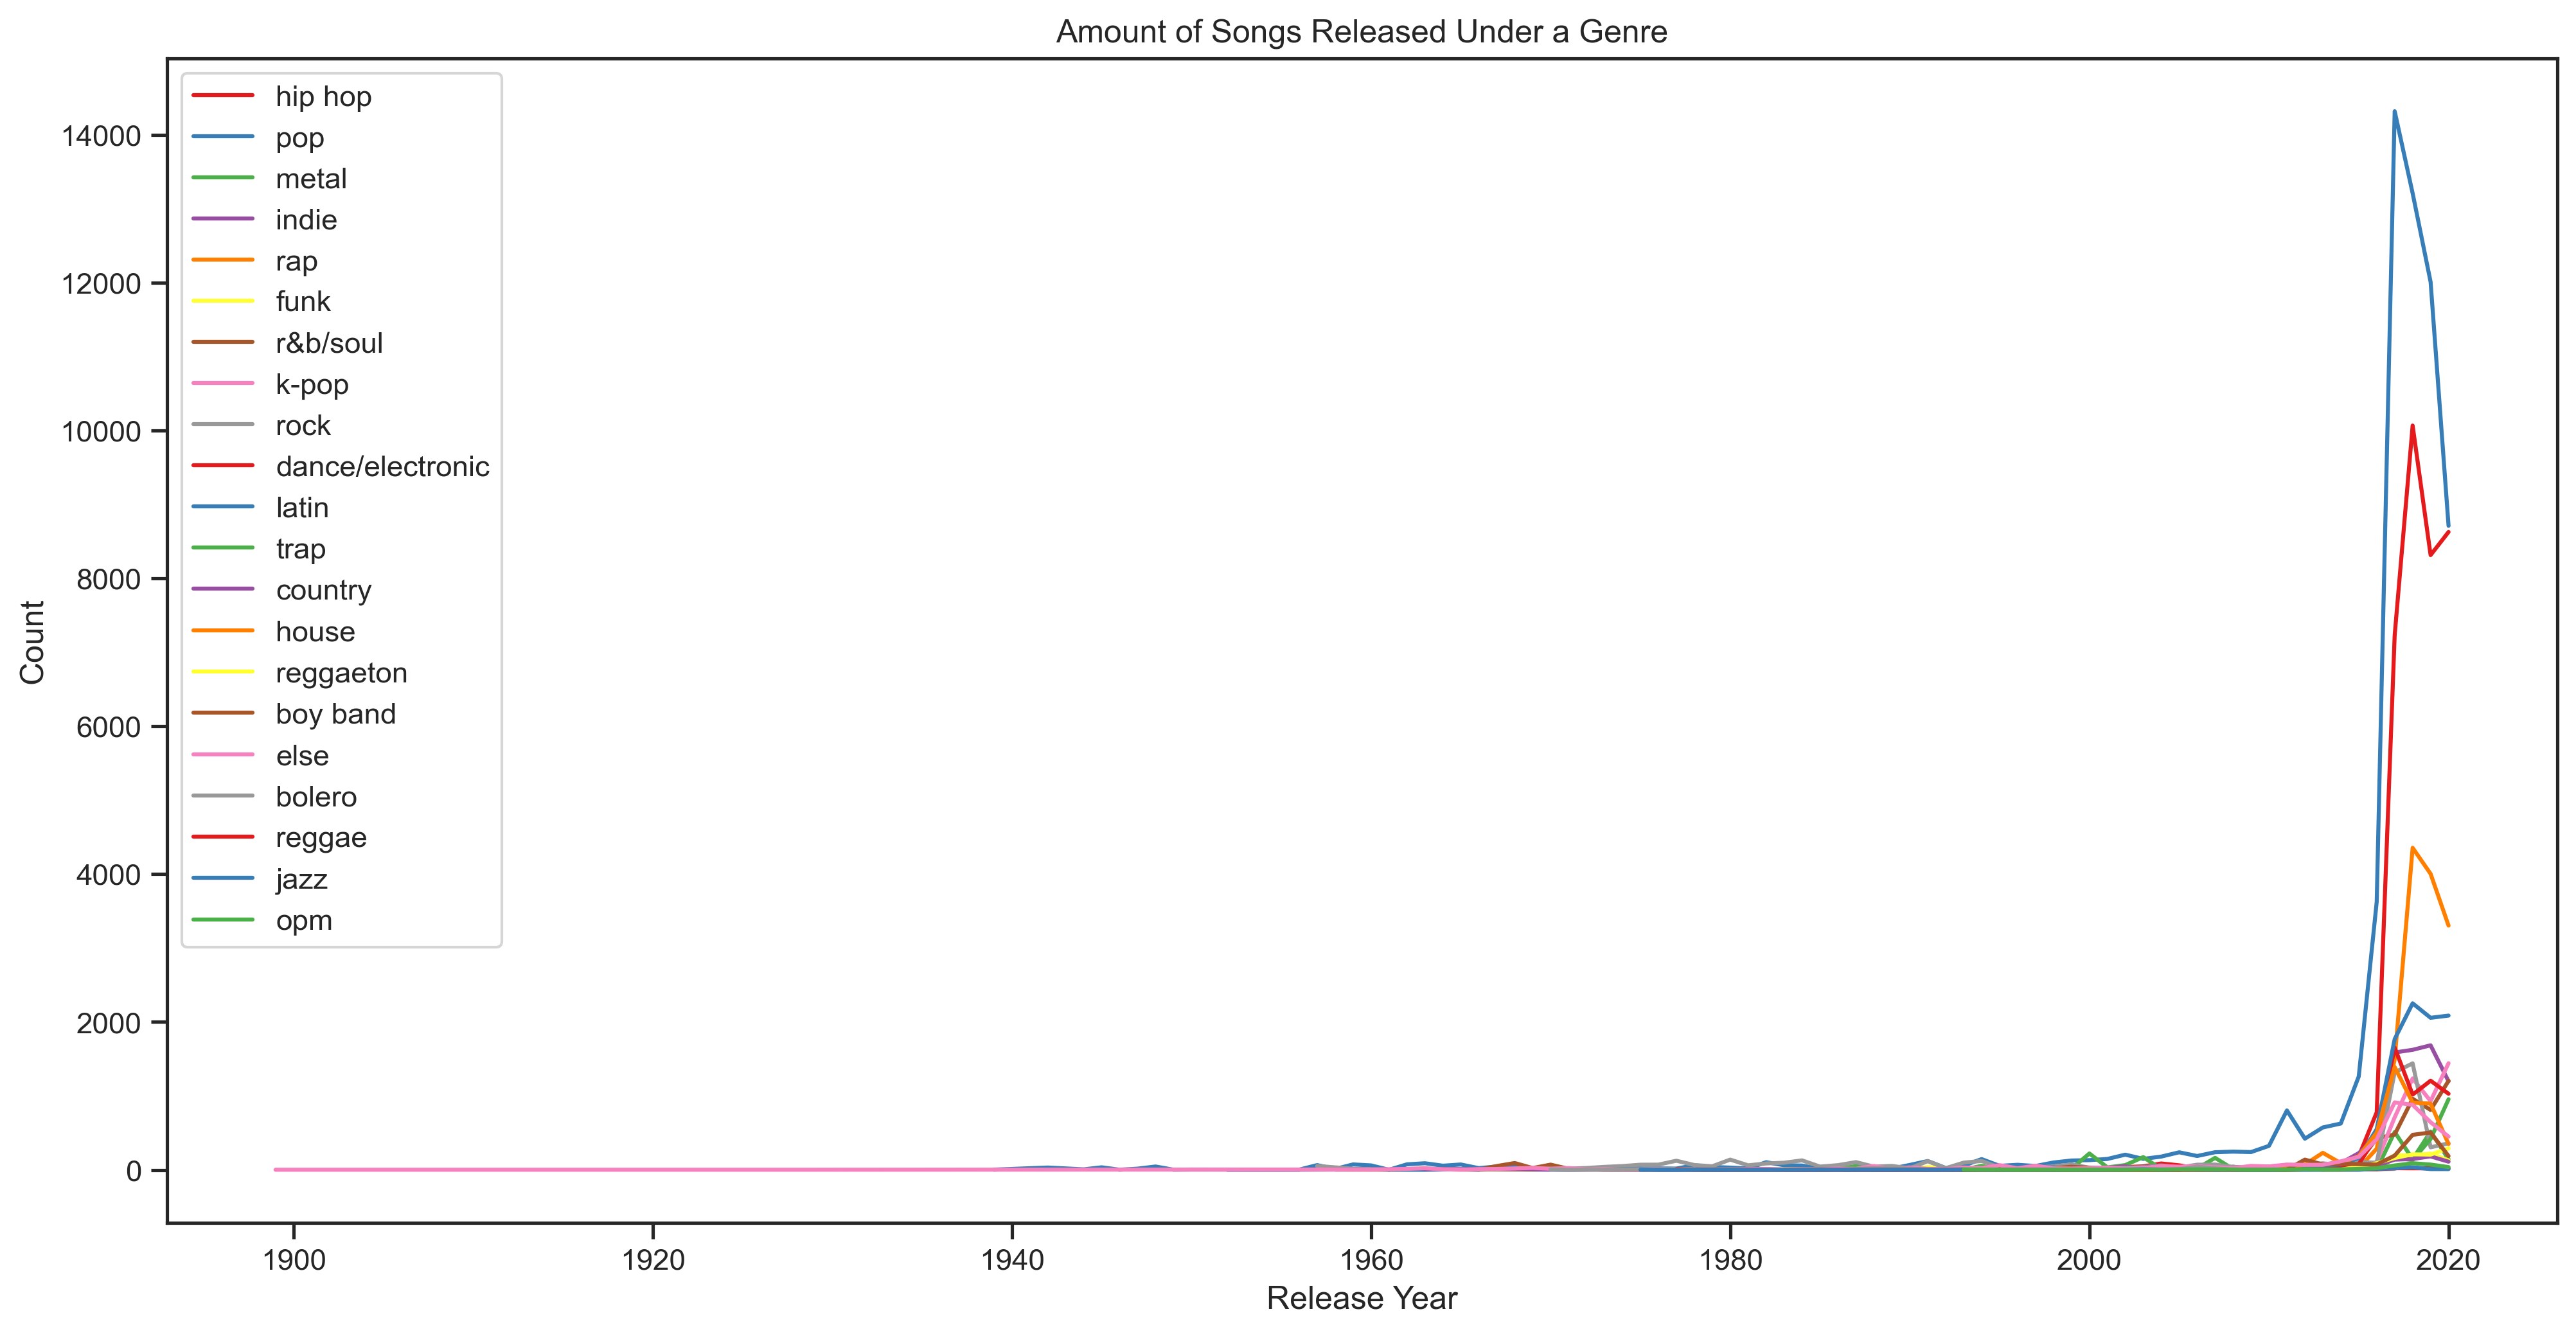

In [123]:
# All genres from 1940 to 2020; ignore
plt.figure(figsize=(16, 8))
sns.set_palette('Set1')
for genre in df['genre'].unique():
    y = df[df['genre'] == genre]['release_year'].value_counts()
    ax= sns.lineplot(data = y,label=genre)

ax.set_ylabel('Count')
ax.set_xlabel('Release Year')
ax.set_title('Amount of Songs Released Under a Genre')

Text(0.5, 1.0, 'Amount of Songs Released Under a Genre')

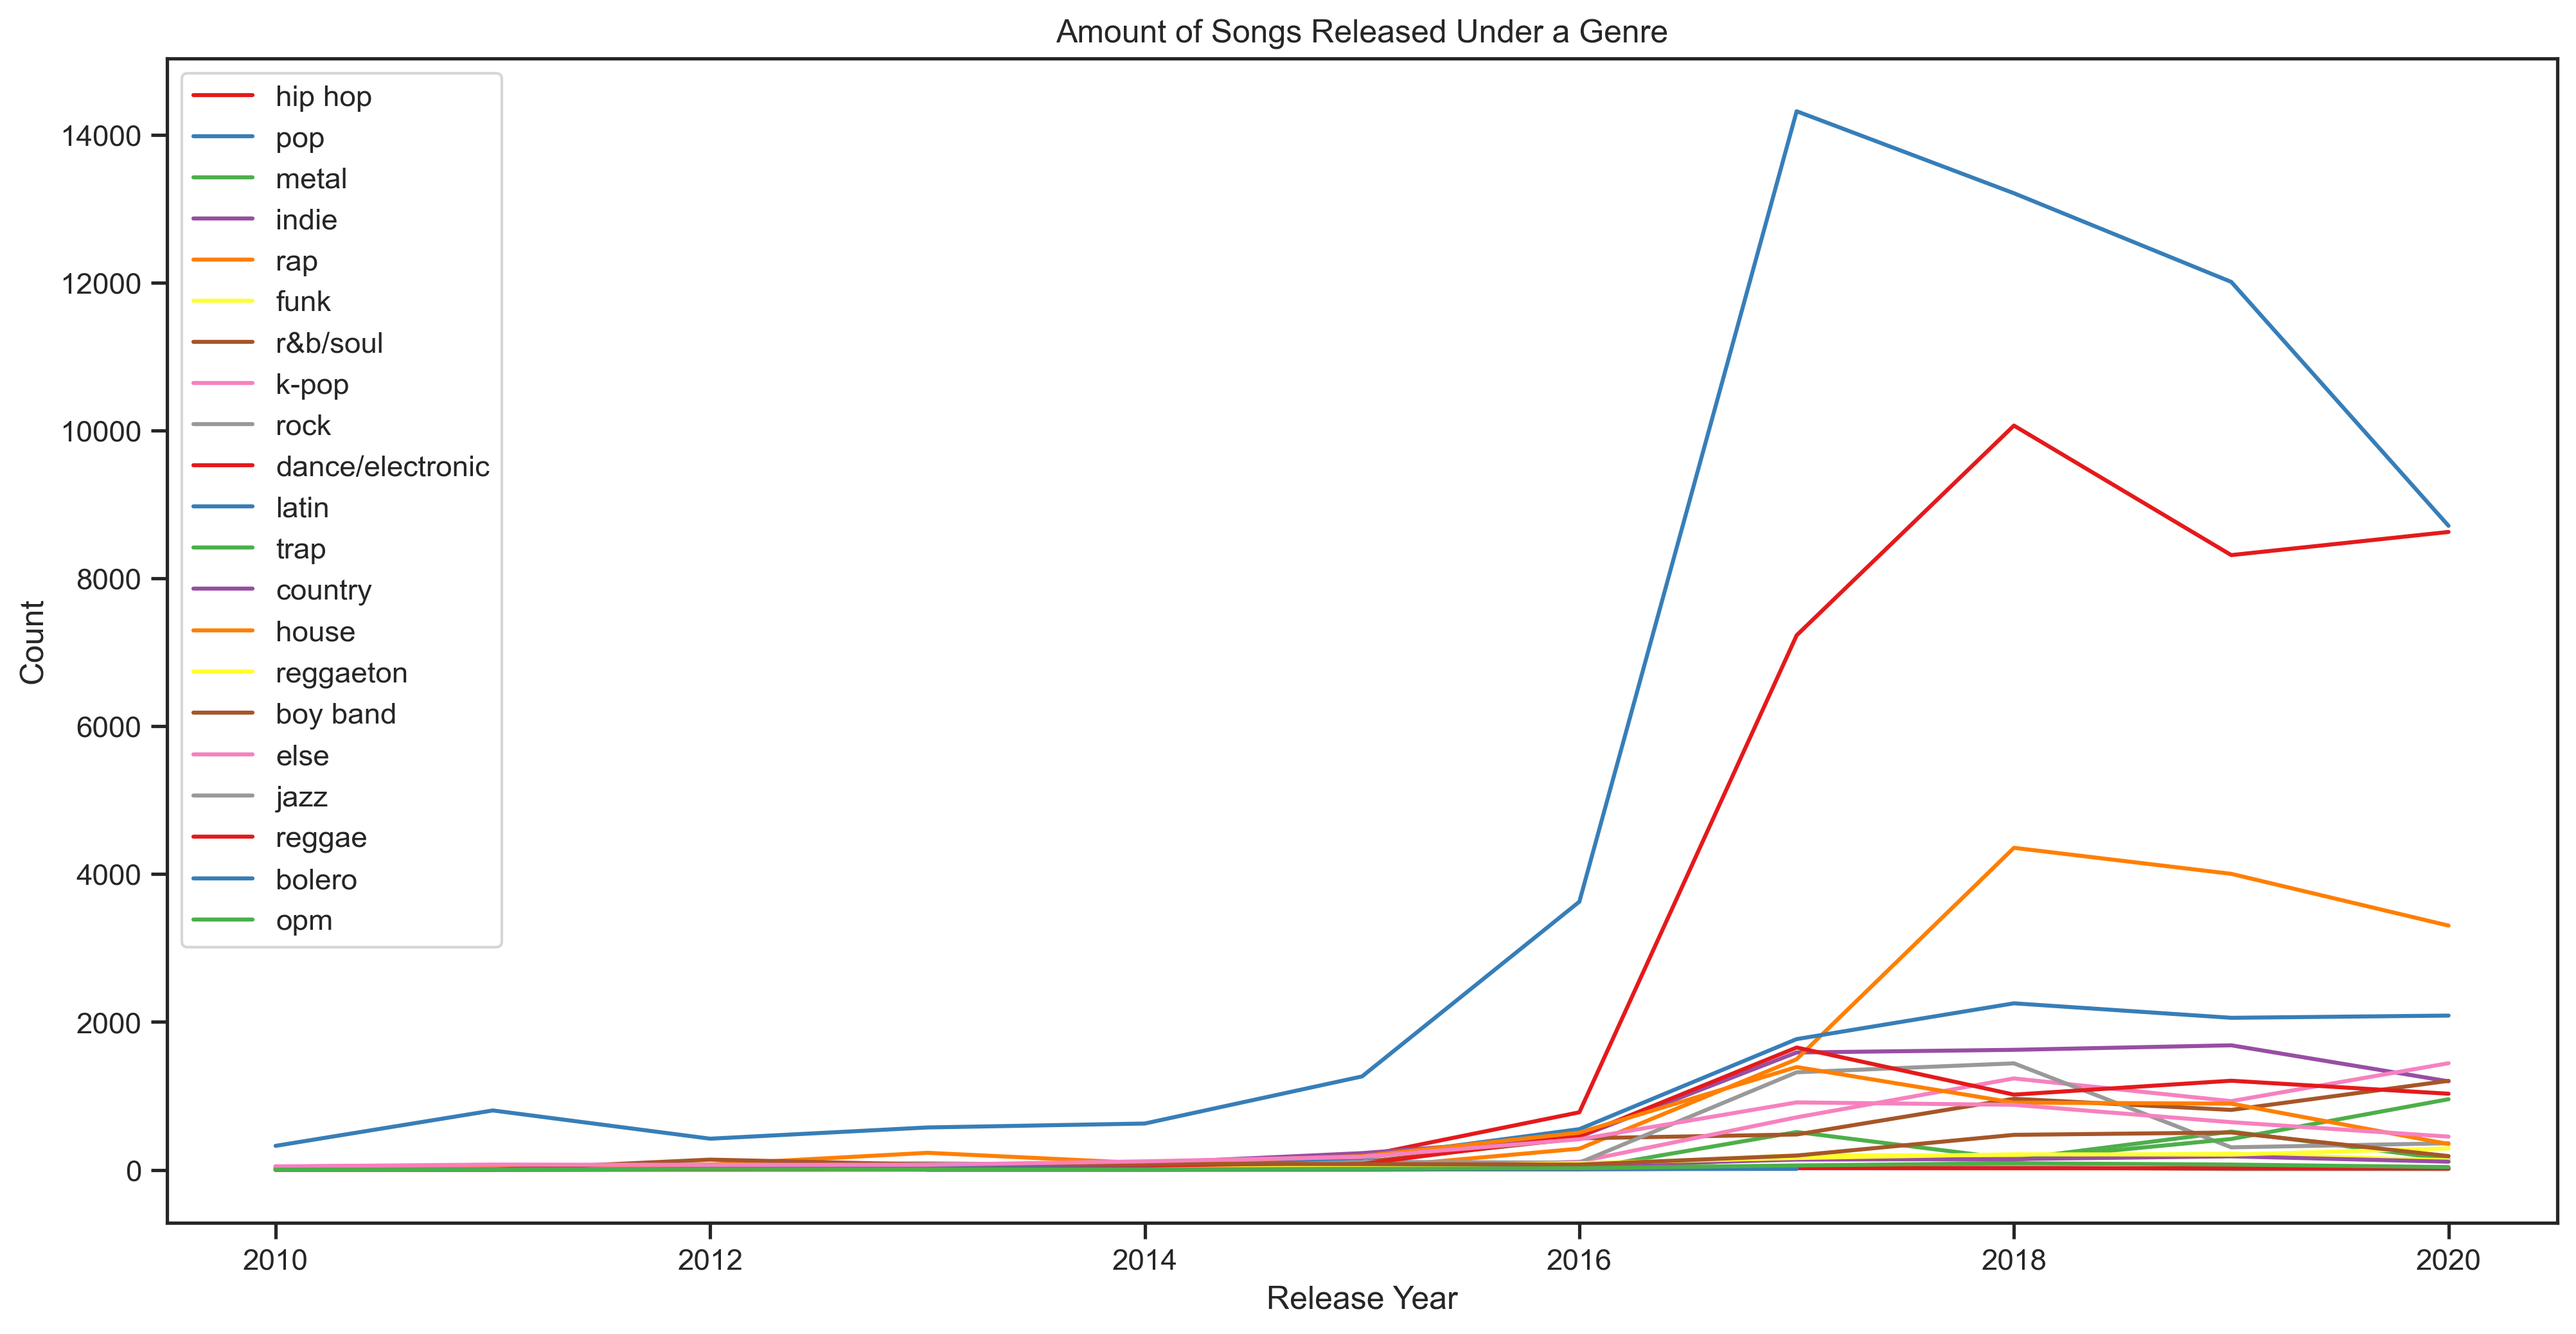

In [124]:
# All genres from 2010 to 2020; ignore
df_2017_2020 = df[df['release_year']>=2010]
plt.figure(figsize=(16, 8))
sns.set_palette("Set1")
for genre in df_2017_2020['genre'].unique():
    y = df_2017_2020[df_2017_2020['genre'] == genre]['release_year'].value_counts()
    ax= sns.lineplot(data = y,label=genre)
    
ax.set_ylabel('Count')
ax.set_xlabel('Release Year')
ax.set_title('Amount of Songs Released Under a Genre')

Text(0.5, 1.0, 'Amount of Songs Released Under the Label of a Genre')

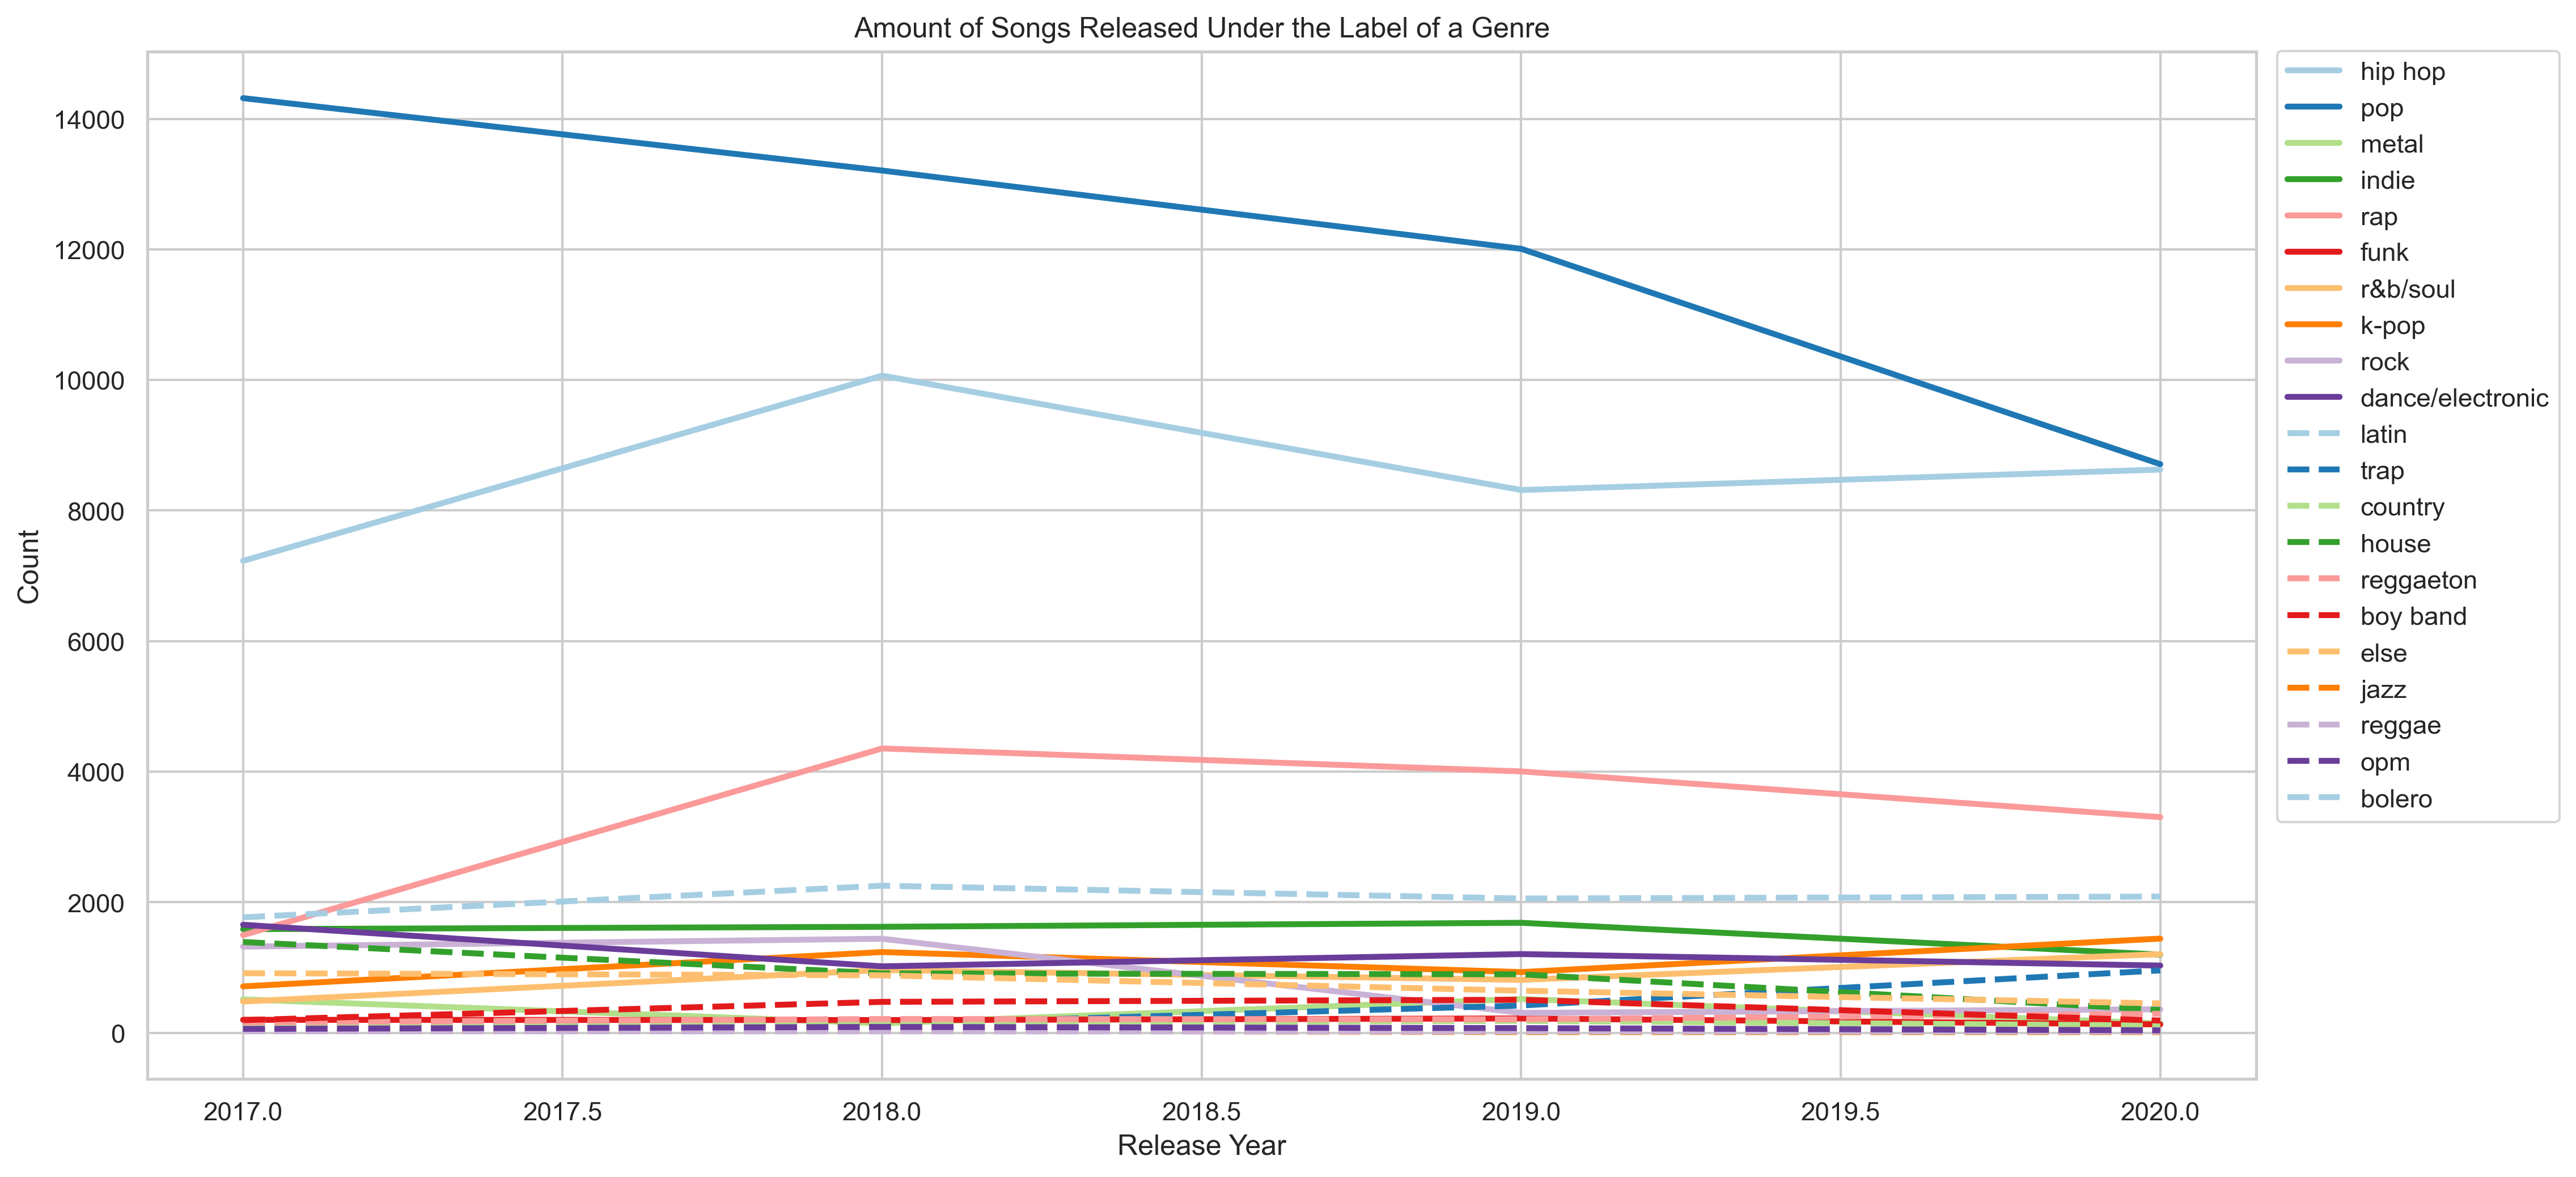

In [125]:
# All genres from 2017 to 2020; don't use
df_2017_2020 = df[df['release_year']>=2017]
plt.figure(figsize=(16, 8))
sns.set_palette("Paired", 10)
sns.set_style('whitegrid')
i=0
for genre in df_2017_2020['genre'].unique():
    i=i+1
    linestyle = '-'
    if i>10:
        linestyle='--'
    y = df_2017_2020[df_2017_2020['genre'] == genre]['release_year'].value_counts()
    ax= sns.lineplot(data = y,label=genre, lw=2.5, linestyle=linestyle)

ax.legend(loc=(1.01,0.25))
ax.set_ylabel('Count')
ax.set_xlabel('Release Year')
ax.set_title('Amount of Songs Released Under the Label of a Genre')

Text(0.5, 1.0, 'Amount of Songs Released Under a Genre')

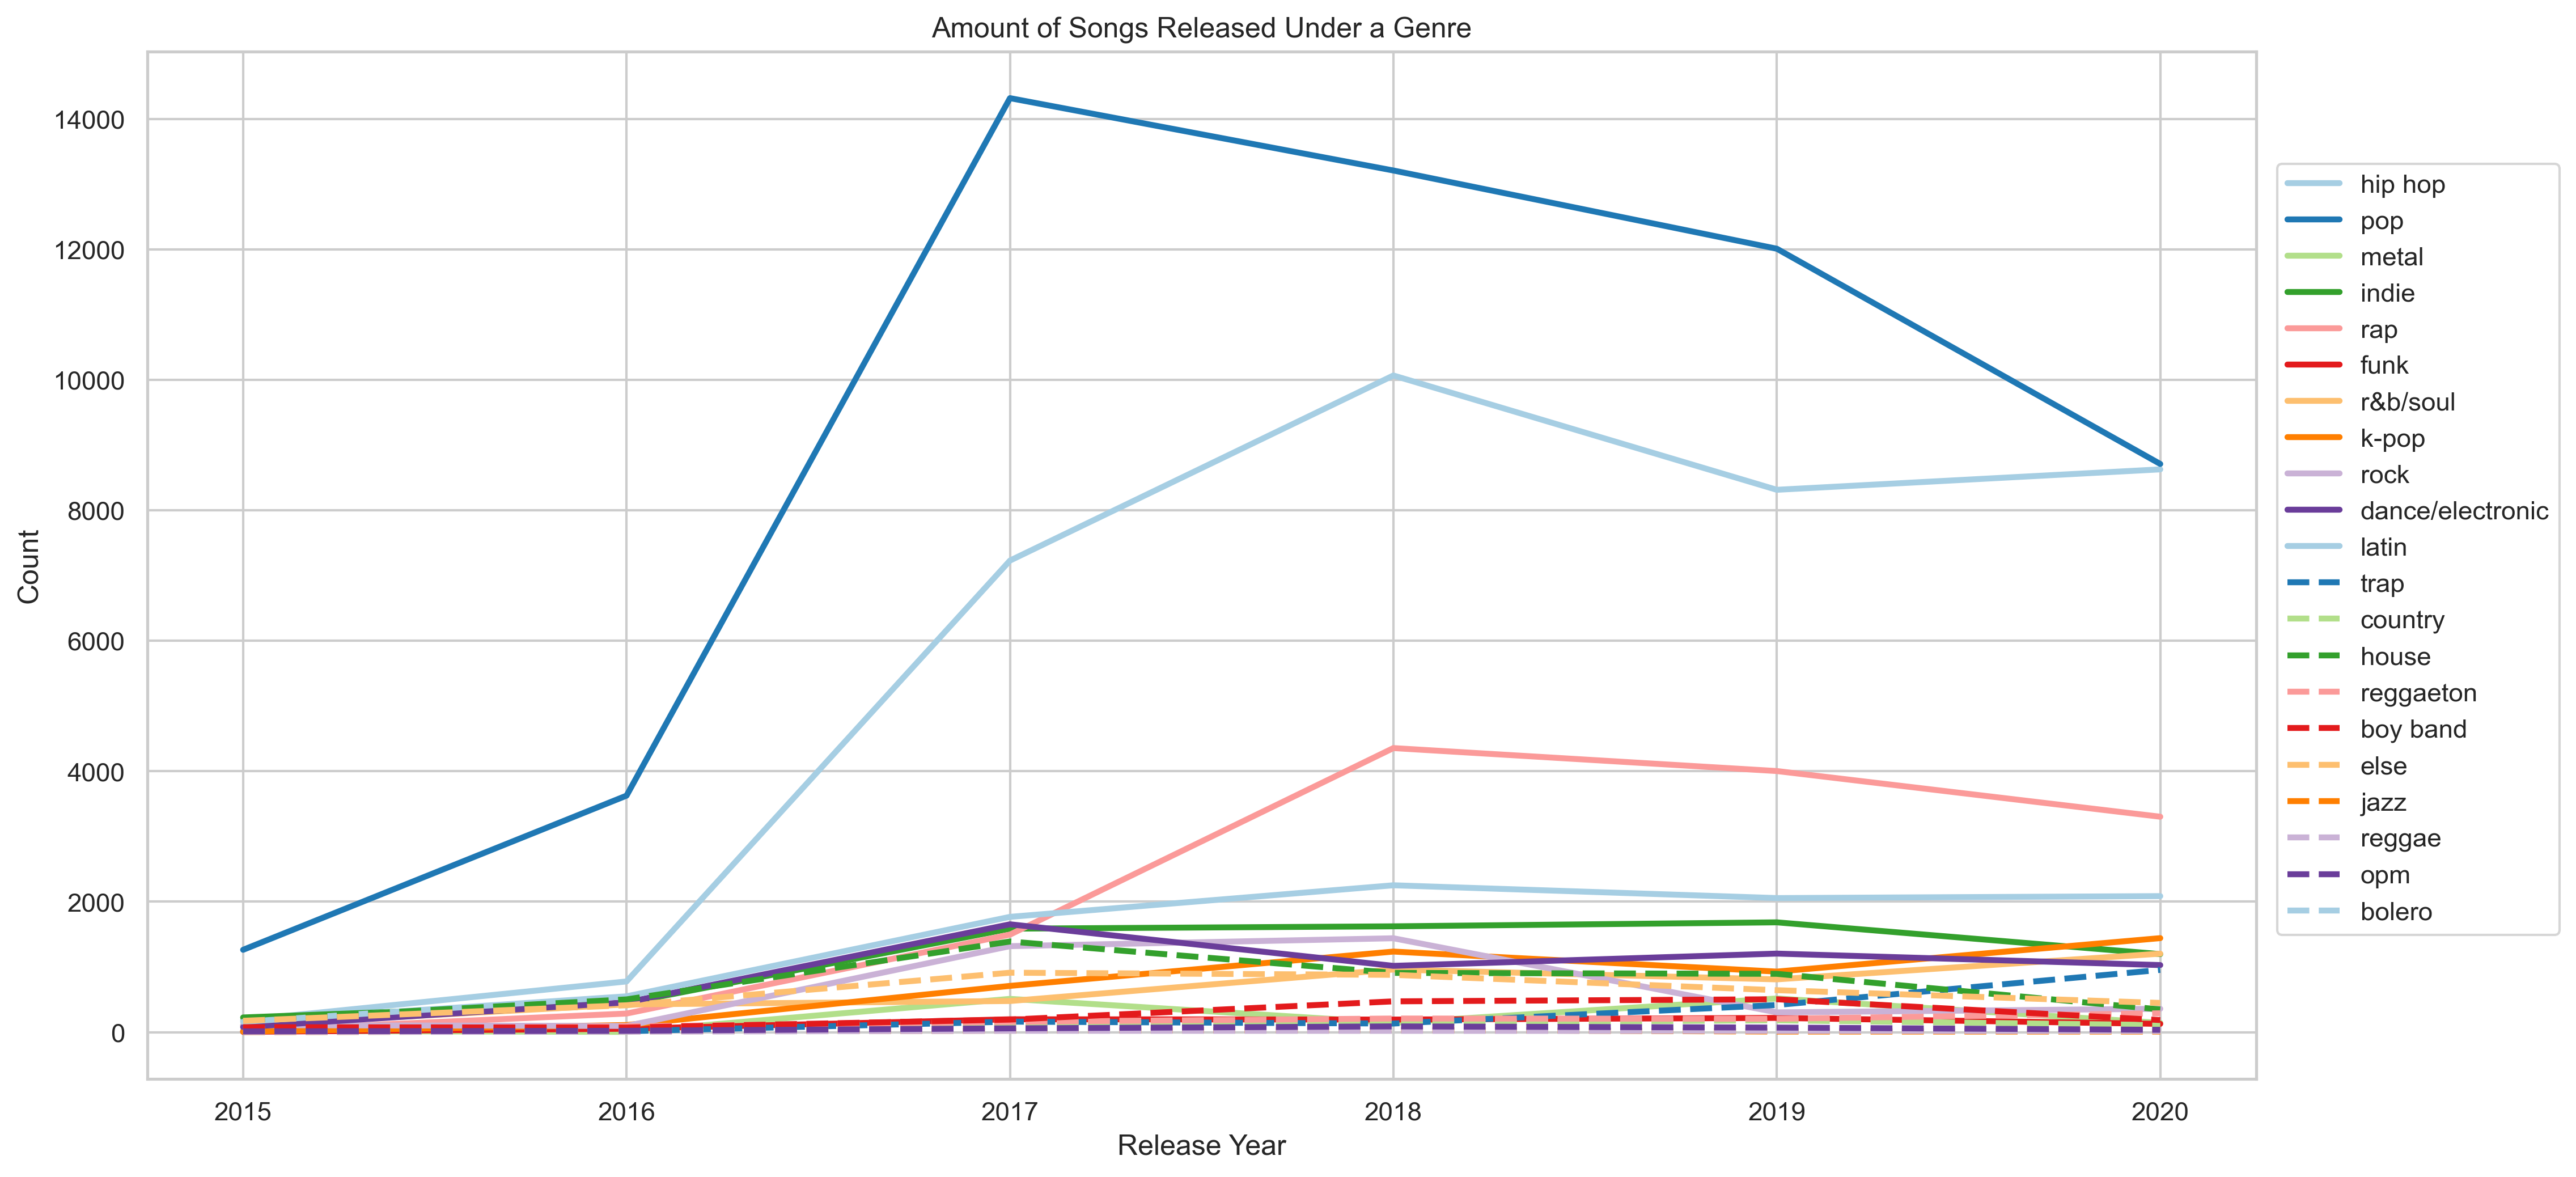

In [126]:
# All genres from 2015 to 2020
df_2015_2020 = df[df['release_year']>=2015]
plt.figure(figsize=(16, 8))
sns.set_palette("Paired", 10)
sns.set_style('whitegrid')
i=0
for genre in df_2015_2020['genre'].unique():
    i=i+1
    linestyle = '-'
    if i>11:
        linestyle='--'
    y = df_2015_2020[df_2015_2020['genre'] == genre]['release_year'].value_counts()
    ax= sns.lineplot(data = y,label=genre, linestyle = linestyle, lw=2.5)

ax.legend(loc=(1.01,0.14))
ax.set_ylabel('Count')
ax.set_xlabel('Release Year')
ax.set_title('Amount of Songs Released Under a Genre')

In [82]:
# df.info()

In [127]:
x=0
for genre in df_2017_2020['genre'].unique():
    y = df_2017_2020[df_2017_2020['genre'] == genre]['release_year'].value_counts().sum()
    x = x+y
x

139363

Text(0.5, 1.0, 'Amount of Songs Released Under a Genre')

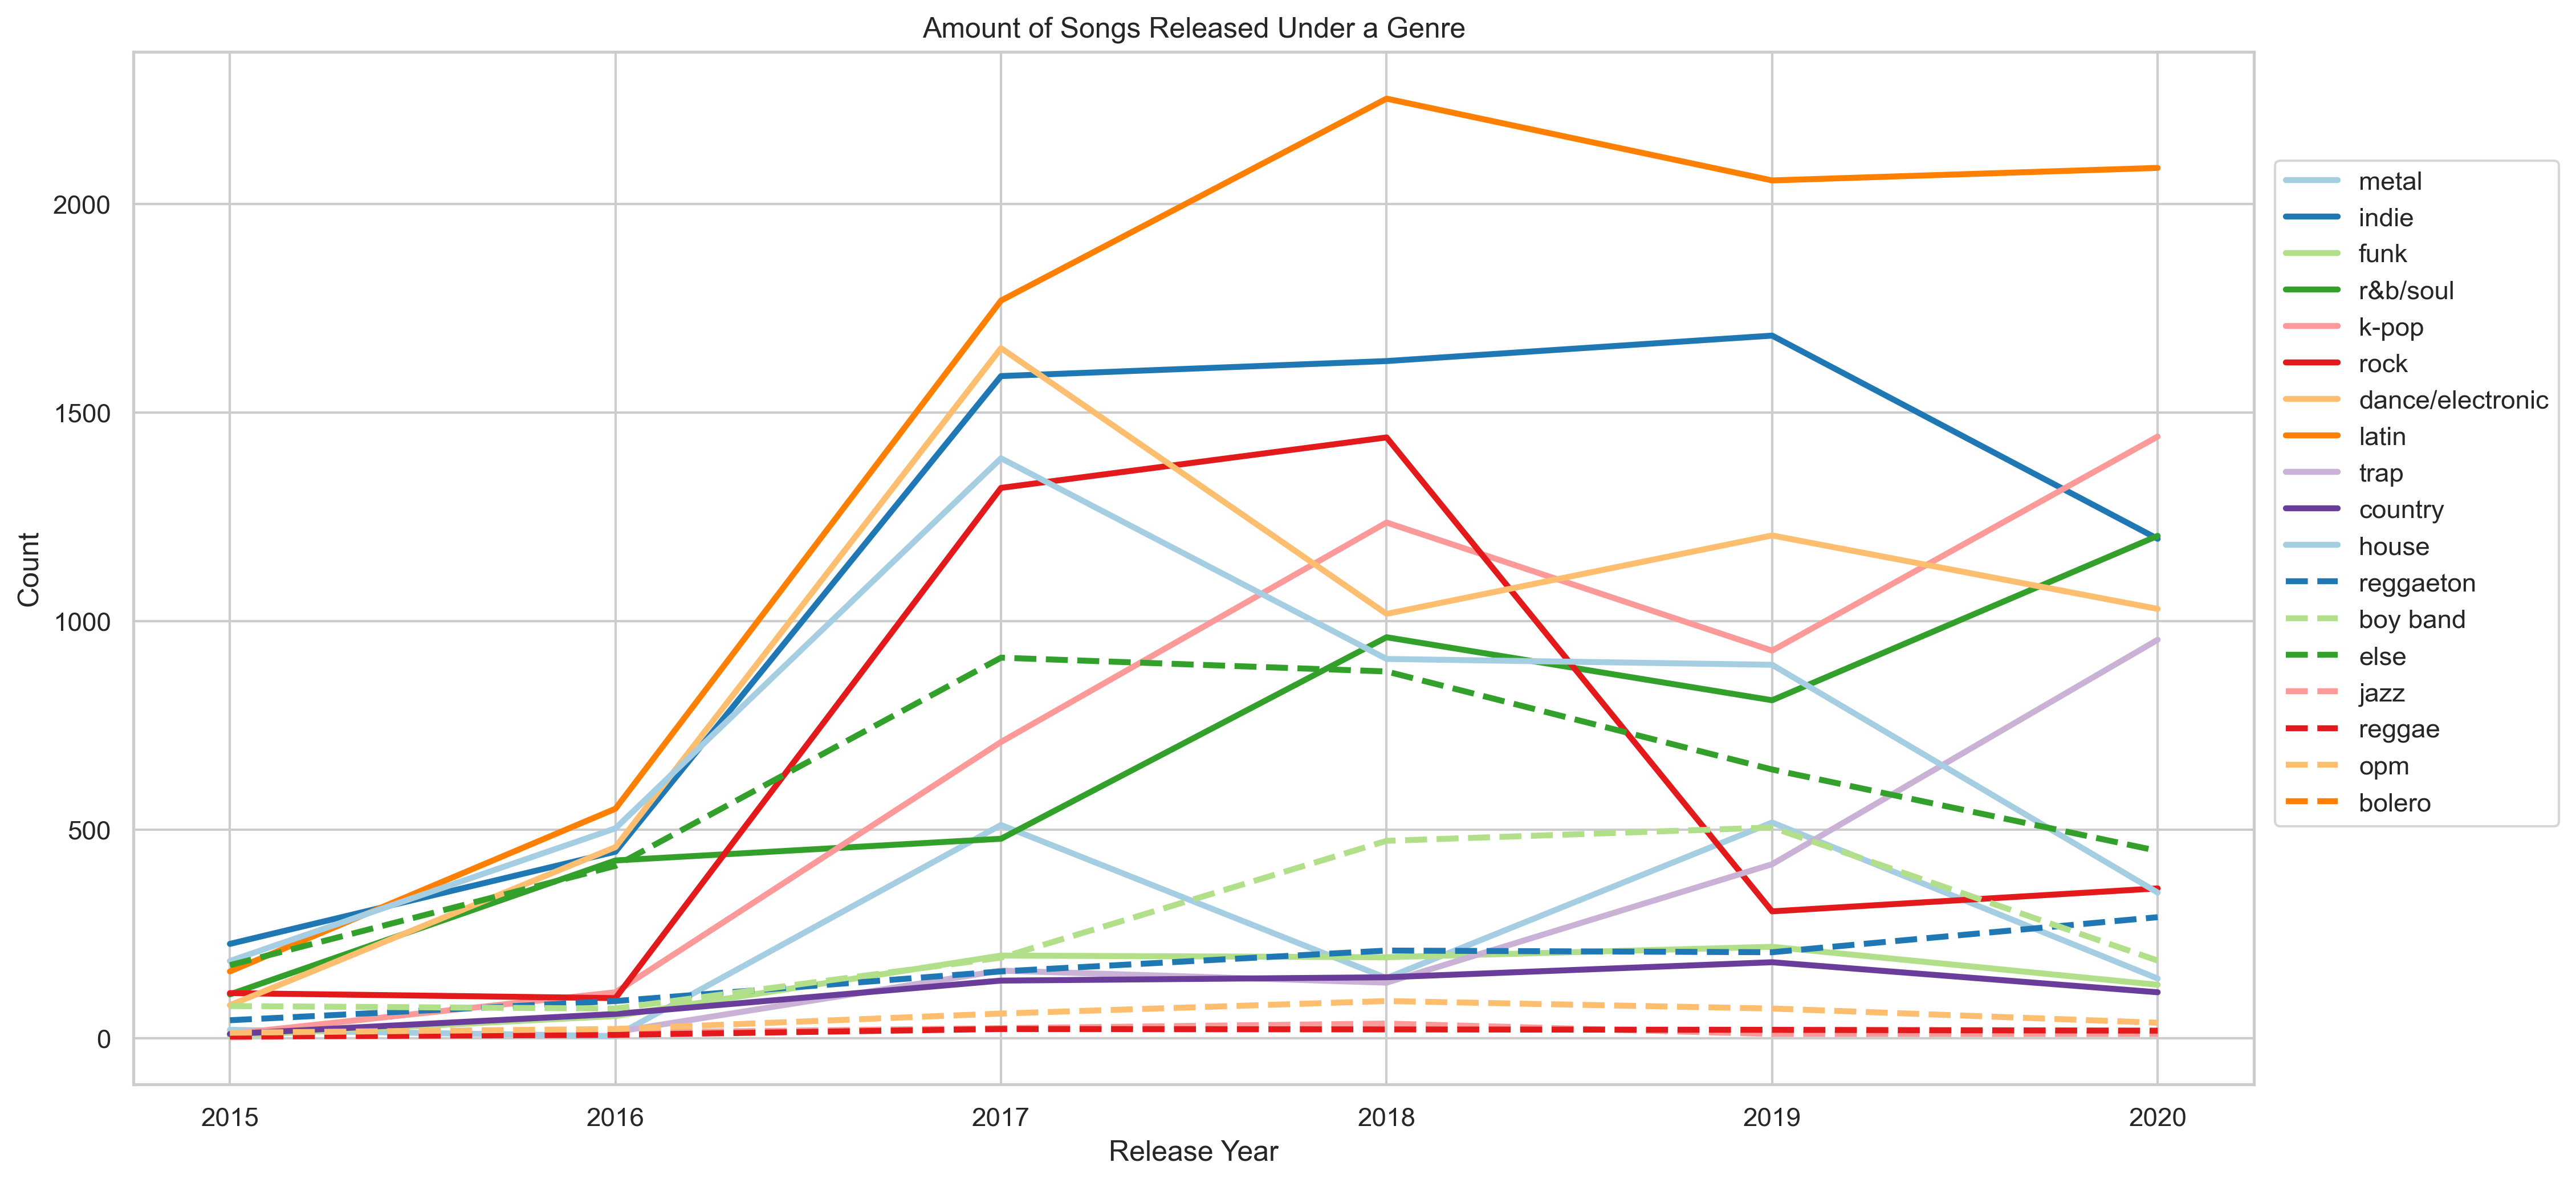

In [128]:
# Without the top 3 genres
# WARNING: not the same colors as above
df_2015_2020 = df[df['release_year']>=2015]
ax = plt.figure(figsize=(16, 8))
sns.set_palette("Paired",10)
sns.set_style('whitegrid')
i=0
for genre in df_2015_2020['genre'].unique():
    i=i+1
    linestyle = '-'
    if i>14:
        linestyle='--'
    if genre != 'pop' and genre != 'rap' and genre != 'hip hop':
        y = df_2015_2020[df_2015_2020['genre'] == genre]['release_year'].value_counts()
        ax= sns.lineplot(data = y,label=genre, linestyle = linestyle,lw=2.5)
        
ax.legend(loc=(1.01,0.25))
ax.set_ylabel('Count')
ax.set_xlabel('Release Year')
ax.set_title('Amount of Songs Released Under a Genre')